In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data
df = pd.read_csv(r'C:\Users\Cecilia\Downloads\ironhack\coursework\projects\week5_labs\lab-eda-univariate\lab-eda-univariate\amz_uk_price_prediction_dataset.csv')

# Step 2: Understand the Data
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [31]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


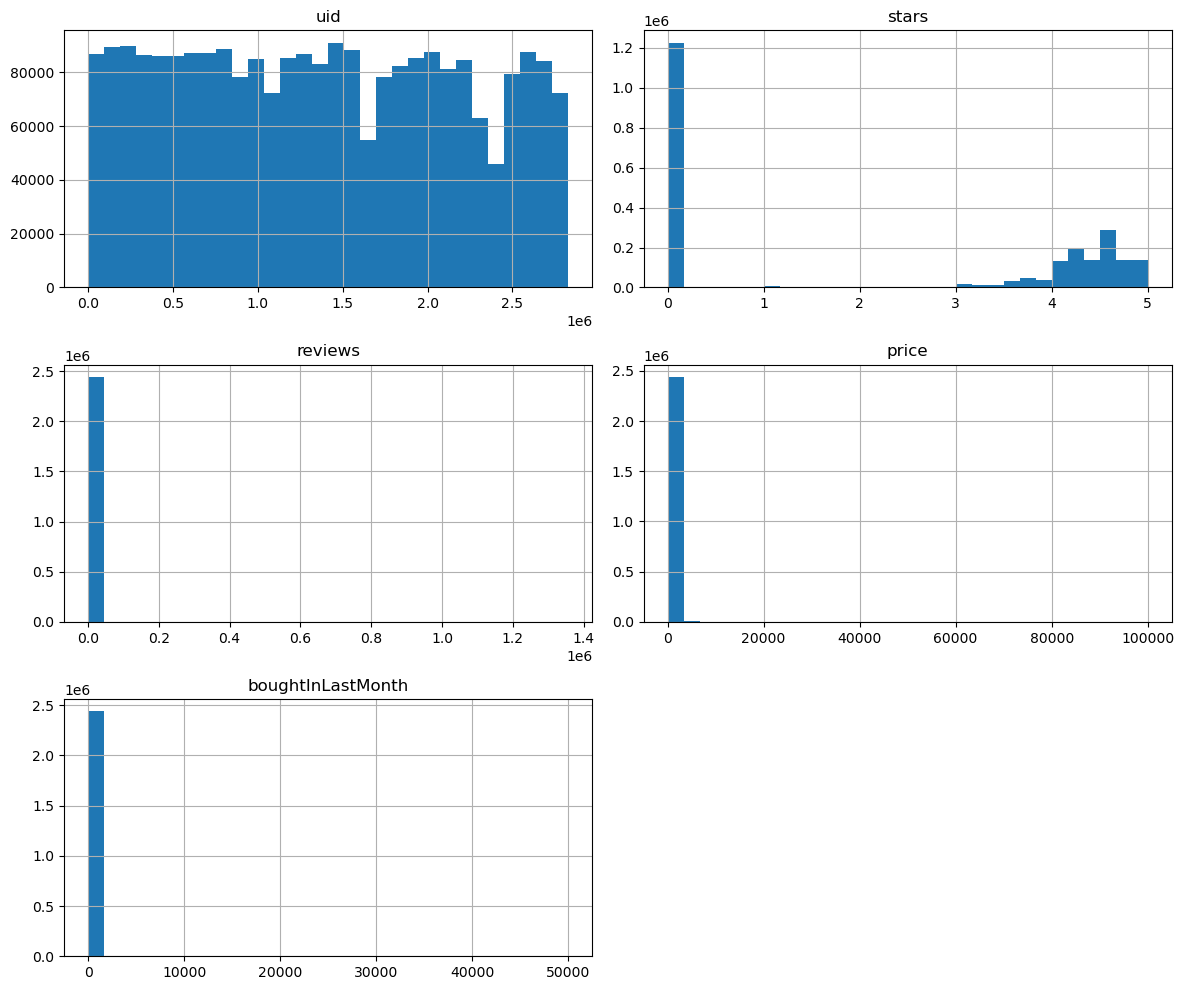

In [33]:
# Plotting histograms for all numeric columns
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [35]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [37]:
# Display value counts for each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for asin:
asin
B083L94P36    7
B08CS1RJYK    7
B07MVP6T9C    7
B0884G1PZ5    7
B08BDG1DR2    7
             ..
B004BW8TYC    1
B0BPMBYBKL    1
B0BV24Z9M4    1
B08NVLFT7M    1
B08P3W9B3T    1
Name: count, Length: 2222742, dtype: int64


Value counts for title:
title
OYhmc Portable Pedal Exerc                                                                                                                                                                        723
ScibOr Outdoor Sleeveless Fishing Vest                                                                                                                                                            322
SHOPPRO Kids Golf Shoes Set, White, with Shoes Bag, UV Sun Protection Arm Sleeves, Golf Pro Cap and Instant Cooling Towel, Outdoor Sneakers, Girls Sport Training, POSMA GSH007WHT39_B (White)    224
Mens Breathable Lace-Up Football Shoes Non-Slip Outdoor Boys Junior Soccer Shoes Training Professional Boots Soccer Sneakers At

In [38]:
# Check the column names
print(df.columns)

product_category_counts = df['category'].value_counts()

# Display the frequency table
display(product_category_counts)

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [41]:
# Get the top 5 most listed product categories
top_5_categories = product_category_counts.head(5)

# Display the top 5 most listed product categories
print(top_5_categories)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


In [48]:
# Calculate mean, median, and mode
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # mode() returns a series, so we take the first value

# Print the results
print(f"Mean price: {mean_price}")
print(f"Median price: {median_price}")
print(f"Mode price: {mode_price}")

Mean price: 89.24380943923663
Median price: 19.09
Mode price: 9.99


In [51]:
# Calculate variance
variance_price = df['price'].var()

# Calculate standard deviation
std_dev_price = df['price'].std()

# Calculate range (max - min)
price_range = df['price'].max() - df['price'].min()

# Calculate interquartile range (IQR)
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

# Print the results
print(f"Variance: {variance_price}")
print(f"Standard Deviation: {std_dev_price}")
print(f"Range: {price_range}")
print(f"Interquartile Range (IQR): {iqr_price}")

Variance: 119445.48532256528
Standard Deviation: 345.60886175352226
Range: 100000.0
Interquartile Range (IQR): 36.0


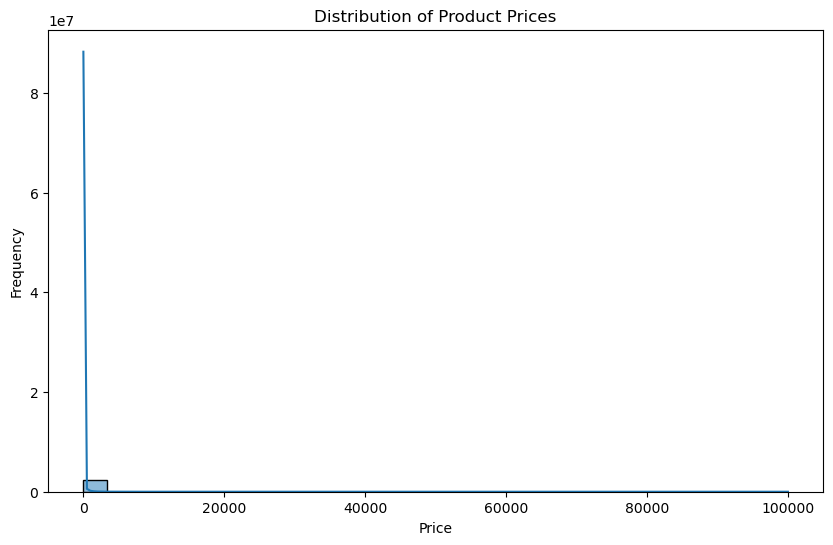

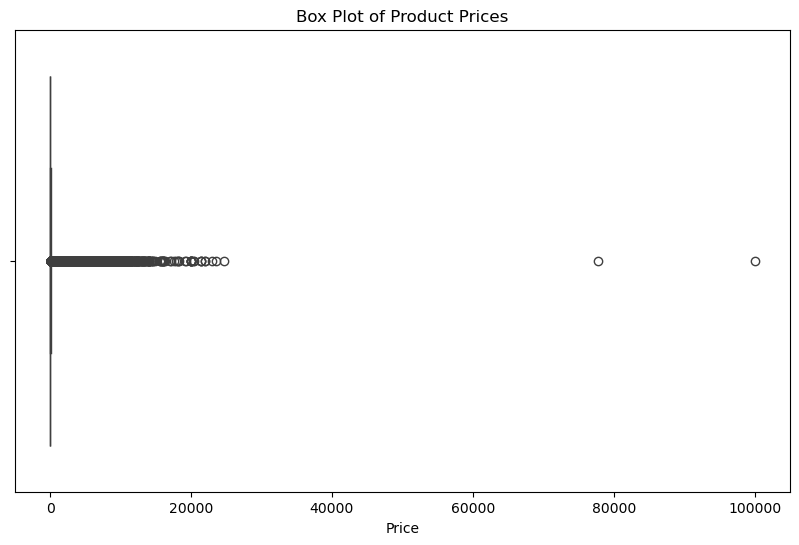

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram to visualize the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)  # KDE adds a smooth curve to see the distribution
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Plotting the box plot to visualize the spread and outliers of product prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title("Box Plot of Product Prices")
plt.xlabel("Price")
plt.show()

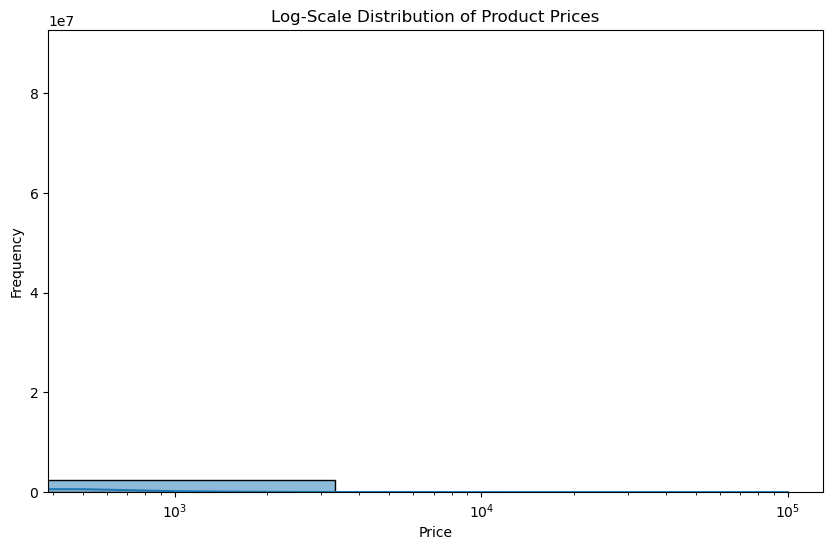

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.xscale('log')  # Apply a logarithmic scale to the x-axis
plt.title("Log-Scale Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

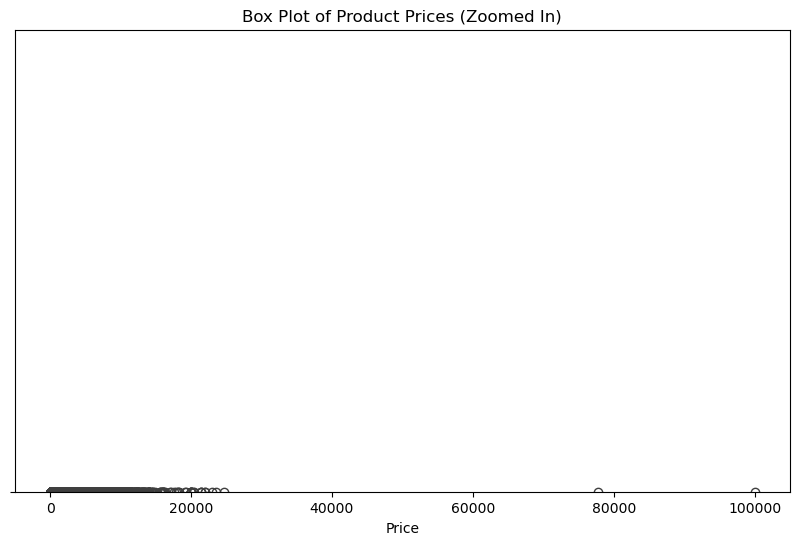

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.ylim(0, 200)  # Limiting y-axis to focus on the majority of prices
plt.title("Box Plot of Product Prices (Zoomed In)")
plt.xlabel("Price")
plt.show()

In [63]:
# Calculate mean, median, and mode for ratings
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]  # mode() returns a Series, take the first value

# Print the results
print(f"Mean star rating: {mean_rating}")
print(f"Median star rating: {median_rating}")
print(f"Mode star rating: {mode_rating}")

Mean star rating: 2.152836472966065
Median star rating: 0.0
Mode star rating: 0.0


In [66]:
# Calculate variance
variance_rating = df['stars'].var()

# Calculate standard deviation
std_dev_rating = df['stars'].std()

# Calculate interquartile range (IQR)
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

# Print the results
print(f"Variance of ratings: {variance_rating}")
print(f"Standard Deviation of ratings: {std_dev_rating}")
print(f"Interquartile Range (IQR) of ratings: {iqr_rating}")

Variance of ratings: 4.81743402976196
Standard Deviation of ratings: 2.1948653785054697
Interquartile Range (IQR) of ratings: 4.4


In [69]:
# Calculate skewness
skewness_rating = df['stars'].skew()

# Calculate kurtosis
kurtosis_rating = df['stars'].kurt()

# Print the results
print(f"Skewness of ratings: {skewness_rating}")
print(f"Kurtosis of ratings: {kurtosis_rating}")

Skewness of ratings: 0.08120735761080985
Kurtosis of ratings: -1.9260061280432985


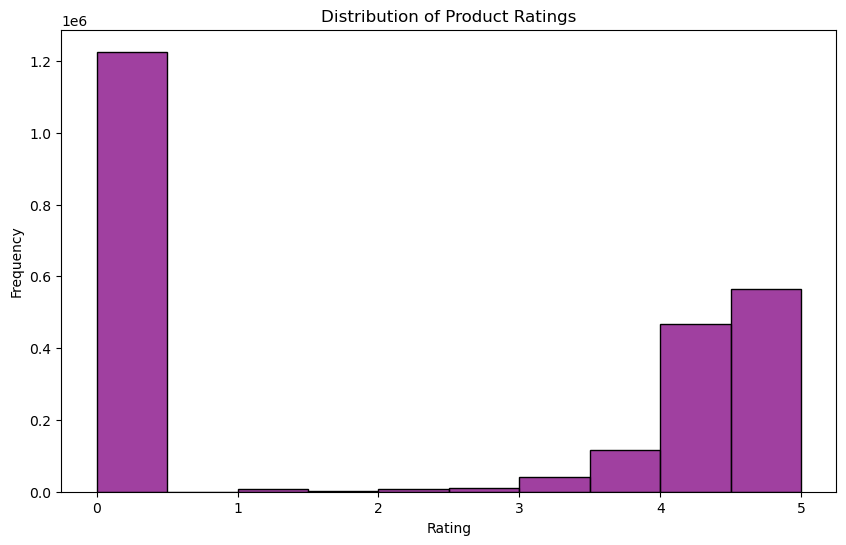

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram to visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=10, kde=False, color='purple', edgecolor='black')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()